In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Read in the data
data = pd.read_csv('C:/Users/Alex/Downloads/TR.csv')

# drop all columns ending with _ar
data = data.loc[:,~data.columns.str.endswith('_ar')]

# convert instance_date to datetime
data['instance_date'] = pd.to_datetime(data['instance_date'], format='%d-%m-%Y')

# remove all raws before 2009
data = data[data['instance_date'] > '2009-01-01']

# remove rows with missing values in the actual_worth column
data = data.dropna(subset=['actual_worth'])

In [44]:
# Look at the first few rows of the dataset
print(data.head())

# Check the data types of each column
print(data.info())

# print all different values of the column 'procedure_name_en'
print(data['procedure_name_en'].unique())

     transaction_id  procedure_id  trans_group_id trans_group_en   
1   1-11-2010-15769            11               1          Sales  \
3    1-11-2010-3056            11               1          Sales   
4  1-11-2009-214345            11               1          Sales   
5   1-110-2014-1257           110               1          Sales   
6    2-13-2014-3052            13               2      Mortgages   

           procedure_name_en instance_date  property_type_id property_type_en   
1                       Sell    2010-10-25                 3             Unit  \
3                       Sell    2010-03-10                 3             Unit   
4                       Sell    2009-07-20                 3             Unit   
5  Lease to Own Registration    2014-06-16                 3             Unit   
6      Mortgage Registration    2014-04-14                 4            Villa   

   property_sub_type_id property_sub_type_en  ... rooms_en  has_parking   
1                  60.0      

In [ ]:
data.head()

# Dubai's Property Market: A Journey Through Time

Dubai, a dynamic city renowned for its awe-inspiring architecture and luxurious lifestyle, has a vibrant property market. Let's embark on a journey through time, exploring the evolution of property worth in Dubai from 2009 to 2023.

findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

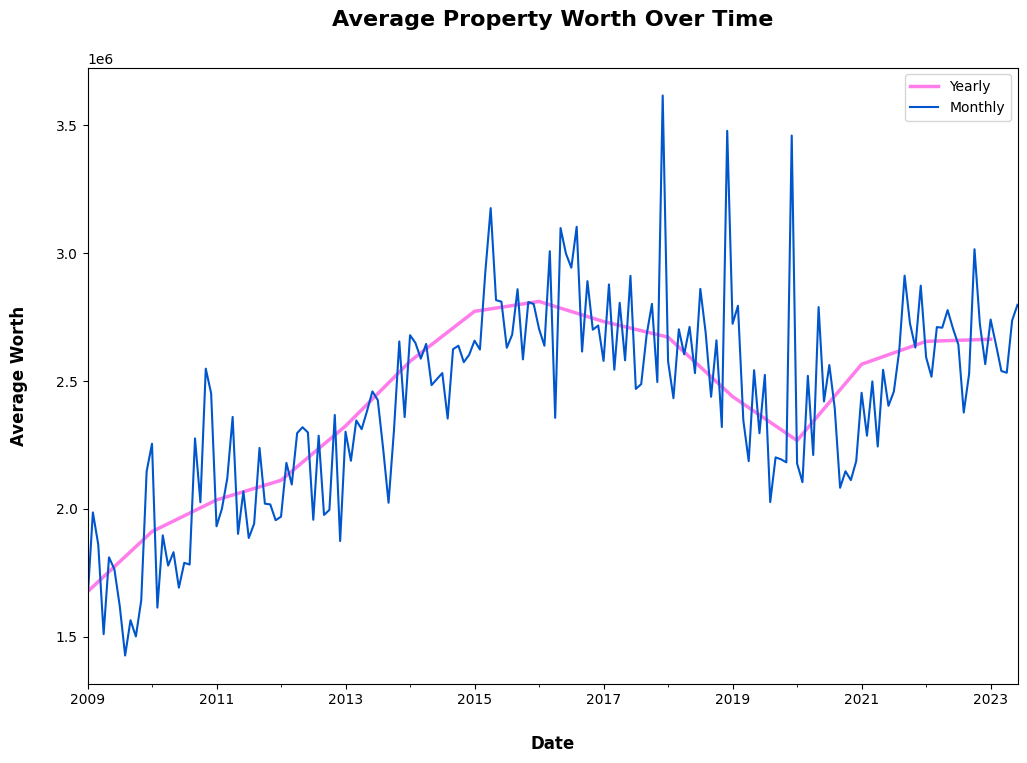

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# Set the font to 'Montserrat'
plt.rcParams['font.family'] = 'Montserrat'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Format the x-axis to display years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Format the y-axis to display as currency
formatter = mtick.StrMethodFormatter('AED{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Create a plot for yearly data
data.groupby(data['instance_date'].dt.to_period("Y"))['actual_worth'].mean().plot(ax=ax, color='#ff7deb', linewidth=2.5, label='Yearly')

# Create a plot for monthly data
data.groupby(data['instance_date'].dt.to_period("M"))['actual_worth'].mean().plot(ax=ax, color='#0056cc', linewidth=1.5, label='Monthly')

# Set title and labels with desired padding
plt.title('Average Property Worth Over Time', pad=30, fontsize=16, fontweight='700')
plt.xlabel('Date', labelpad=20, fontsize=12, fontweight='700')
plt.ylabel('Average Worth', labelpad=20, fontsize=12, fontweight='700')

# Create a legend
plt.legend()

# Show the plot
plt.show()


## Observations:

1. **Phase of Growth (2009 - 2016)**: Starting our journey in 2009, the real estate landscape was beginning to regain its stability following the global financial crisis, with an average property worth of around AED 1.67 million. As we traverse through the years to 2016, we notice a steady upswing, with property worth peaking at around AED 2.81 million. The growth during this period can be attributed to several factors such as economic growth, increasing demand for properties, and rising prices.
    
2. **Phase of Contraction (2016 - 2020)**: As we move into the next phase, we notice a slight decline in property worth. From 2016 to 2020, the average property value dipped to AED 2.27 million. Various elements might have contributed to this dip, including market corrections, global economic slowdown, and other external influences.
    
3. **Phase of Recovery (2020 - 2023)**: Navigating towards the end of our journey, we find a remarkable resurgence in the property market. Post-2020, the average property worth started climbing again, hitting approximately AED 2.66 million in 2023. This resurgence could be a result of economic recovery, a renewed interest in the property market, and other favourable market conditions.

findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

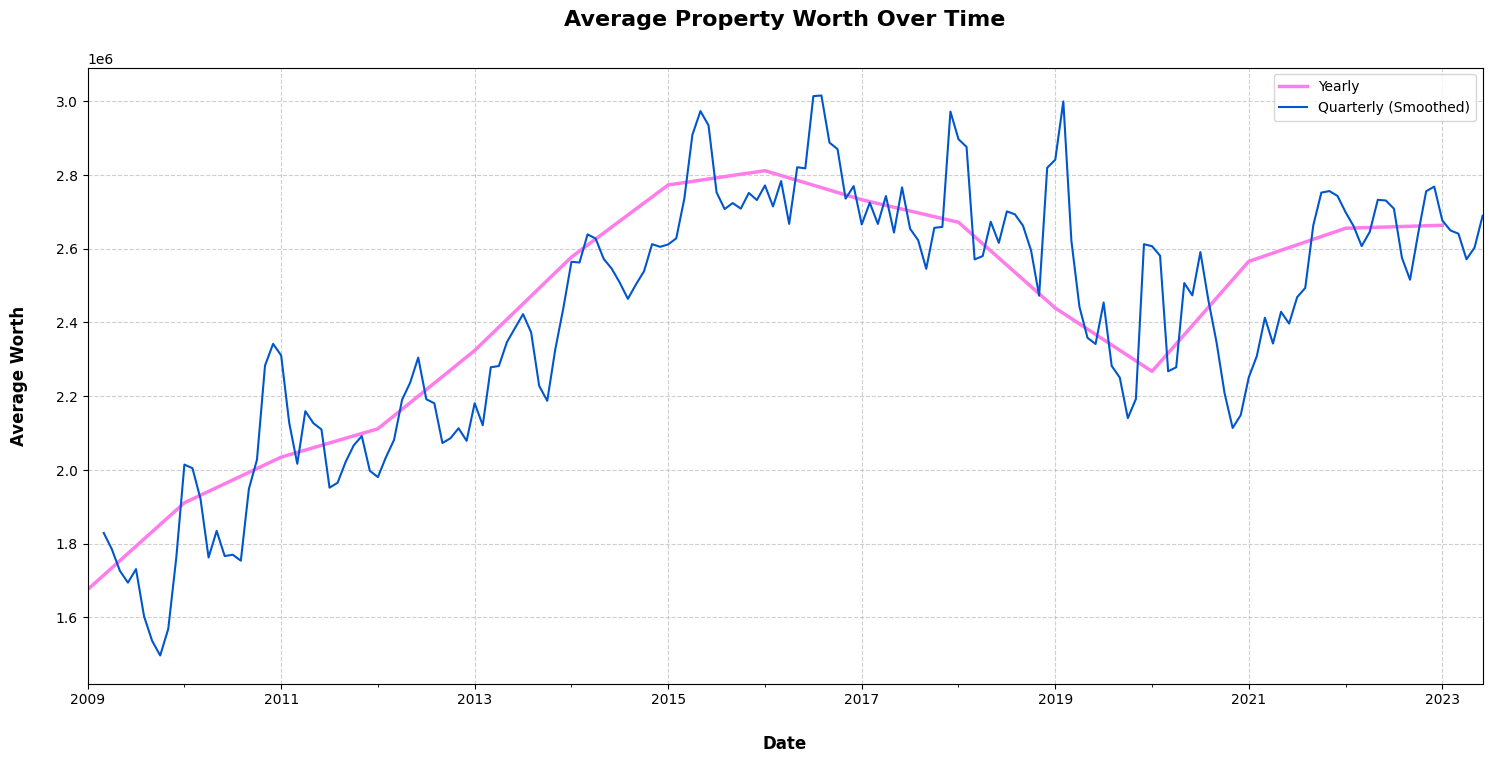

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# Set the font to 'Montserrat'
plt.rcParams['font.family'] = 'Montserrat'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Format the x-axis to display years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Format the y-axis to display as currency
formatter = mtick.StrMethodFormatter('AED{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Create a plot for yearly data
data.groupby(data['instance_date'].dt.to_period("Y"))['actual_worth'].mean().plot(ax=ax, color='#ff7deb', linewidth=2.5, label='Yearly')

# Calculate monthly average property worth and 3-month (quarterly) rolling average
monthly_data = data.groupby(data['instance_date'].dt.to_period("M"))['actual_worth'].mean()
monthly_data_smooth = monthly_data.rolling(window=3).mean()

# Create a plot for smoothed monthly data
monthly_data_smooth.plot(ax=ax, color='#0056cc', linewidth=1.5, label='Quarterly (Smoothed)')

# Set title and labels with desired padding
plt.title('Average Property Worth Over Time', pad=30, fontsize=16, fontweight='700')
plt.xlabel('Date', labelpad=20, fontsize=12, fontweight='700')
plt.ylabel('Average Worth', labelpad=20, fontsize=12, fontweight='700')

# Create a legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

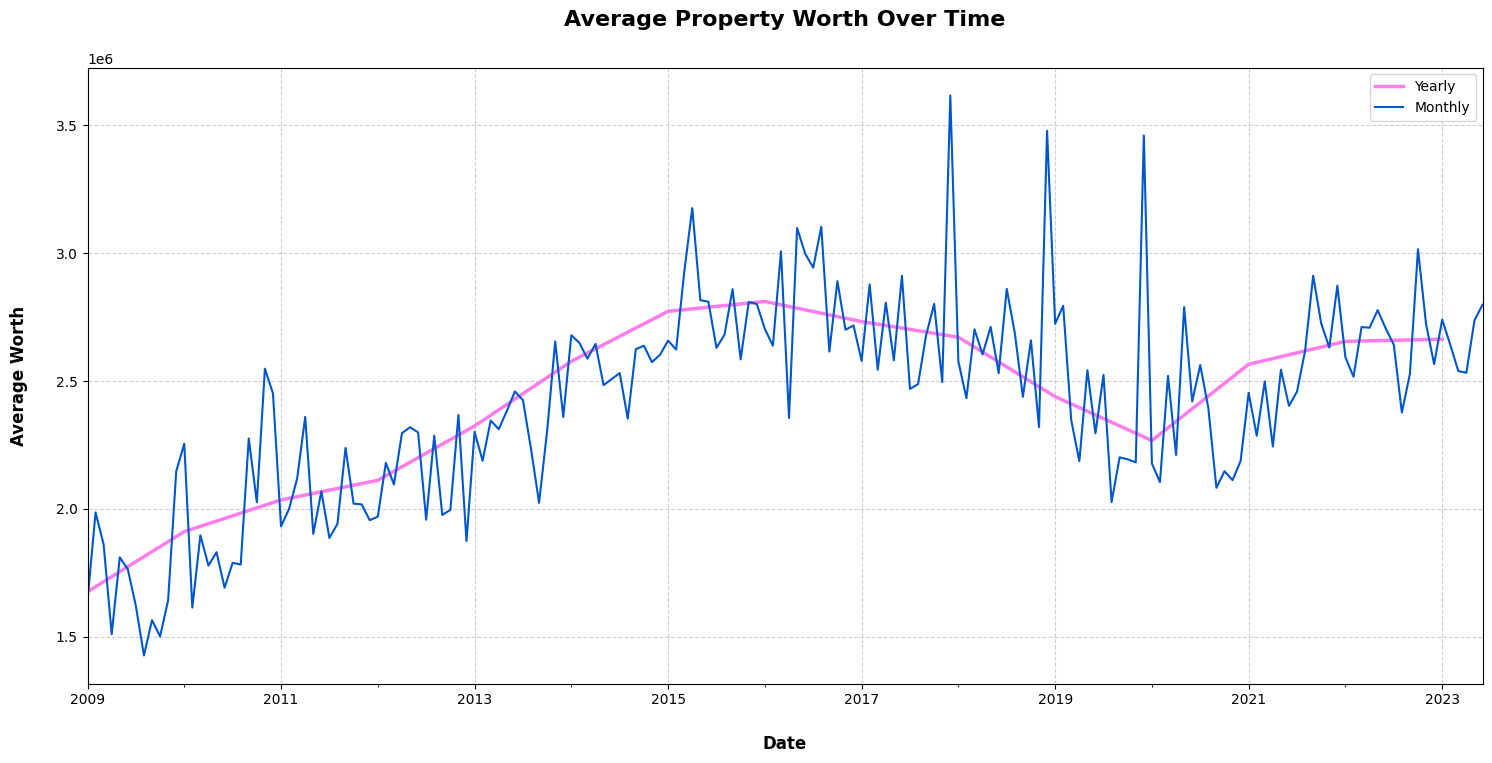

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# Set the font to 'Montserrat'
plt.rcParams['font.family'] = 'Montserrat'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Format the x-axis to display years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Format the y-axis to display as currency
formatter = mtick.StrMethodFormatter('AED{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Create a plot for yearly data
data.groupby(data['instance_date'].dt.to_period("Y"))['actual_worth'].mean().plot(ax=ax, color='#ff7deb', linewidth=2.5, label='Yearly')

# Create a new column for the month and year
data['month_year'] = data['instance_date'].dt.to_period('M')

# Group by year and month, then compute mean property worth
monthly_data = data.groupby('month_year')['actual_worth'].mean()

# Create a plot for monthly data
monthly_data.plot(ax=ax, color='#0056cc', linewidth=1.5, label='Monthly')

# Set title and labels with desired padding
plt.title('Average Property Worth Over Time', pad=30, fontsize=16, fontweight='700')
plt.xlabel('Date', labelpad=20, fontsize=12, fontweight='700')
plt.ylabel('Average Worth', labelpad=20, fontsize=12, fontweight='700')

# Create a legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [51]:
# Create a new column for the month
data['month'] = data['instance_date'].dt.month

# Group by month, then compute mean property worth
monthly_avg_data = data.groupby('month')['actual_worth'].mean()

# Find the month with maximum average property worth
peak_month = monthly_avg_data.idxmax()

print(f"The property value usually peaks in month: {peak_month}")


The property value usually peaks in month: 12


In [52]:
# Define the mapping of months to seasons
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 
           11: 'Autumn', 12: 'Winter'}

# Add a new column for the season of each instance date
data['season'] = data['instance_date'].dt.month.map(seasons)

# Group by season and calculate the average actual worth
seasonal_worth = data.groupby('season')['actual_worth'].mean()

# Find the season with the highest average worth
highest_season = seasonal_worth.idxmax()

print(f"The highest average property worth typically occurs in: {highest_season}")


The highest average property worth typically occurs in: Winter
